In [ ]:
try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


In [ ]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")
print ("Webpage opened successfully...")

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


In [ ]:
# Define an empty list where the data will be kept
countries_dependency_data = []

# Find all the tables in the webpage page that we have just parsed
table = bs.find ("table", {"class": "wikitable"})

for row in table:
    line = row.text
countries_dependency_data.append(line)


print(countries_dependency_data)

['\n\nCountry / Dependency\nPopulation\n% ofworld\nDate\nSource (official or fromthe United Nations)\n\n\n\n–\n\nWorld\n\n8,065,326,000\n100%\n13 Oct 2023\n\nUN projection[3]\n\n\n\n1\n\n\xa0China\n\n1,411,750,000\n17.5%\n31 Dec 2022\n\nOfficial estimate[4]\n[b]\n\n\n2\n\n\xa0India\n\n1,392,329,000\n17.3%\n1 Mar 2023\n\nOfficial projection[5]\n[c]\n\n\n3\n\n\xa0United States\n\n335,504,000\n4.2%\n13 Oct 2023\n\nNational population clock[7]\n[d]\n\n\n4\n\n\xa0Indonesia\n\n278,696,200\n3.5%\n1 Jul 2023\n\nNational annual projection[8]\n\n\n\n5\n\n\xa0Pakistan\n\n241,499,431\n3.0%\n1 Mar 2023\n\n2023 census result[9]\n[e]\n\n\n6\n\n\xa0Nigeria\n\n216,783,400\n2.7%\n21 Mar 2022\n\nOfficial projection[10]\n\n\n\n7\n\n\xa0Brazil\n\n203,062,512\n2.5%\n1 Aug 2022\n\n2022 census result[11]\n\n\n\n8\n\n\xa0Bangladesh\n\n169,828,911\n2.1%\n14 Jun 2022\n\n2022 census result[12]\n\n\n\n9\n\n\xa0Russia\n\n146,424,729\n1.8%\n1 Jan 2023\n\nOfficial estimate[13]\n[f]\n\n\n10\n\n\xa0Mexico\n\n129,202,48

In [ ]:
import pandas as pd

column_names = ["Country/Dependency", "Population", "% of world", "Date", "Source (official or from the United Nation)"]
column_data = []

for column_name in column_names:
    column_data.append({column_name: ""})

print(column_data[:5])


[{'Country/Dependency': ''}, {'Population': ''}, {'% of world': ''}, {'Date': ''}, {'Source (official or from the United Nation)': ''}]


In [ ]:
import pandas as pd

opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")


bs = BeautifulSoup(opened_webpage.content, "html.parser")


countries_dependency_data = []
table = bs.find ("table", {"class": "wikitable"})
rows = table.find_all("tr")
columns = ["Country/Dependency","Population","% of world","Date","Source (official or from the United Nation)"]

for row in rows:
    cells = row.find_all("td")
    row_data = {}
    cell_texts = [cell.text.strip() for cell in cells]
    for i in range(min(len(columns), len(cell_texts))):
      row_data[columns[i]] = cell_texts[i]
    countries_dependency_data.append(row_data)
final_countries_dependency_data = pd.DataFrame(countries_dependency_data)

print(final_countries_dependency_data)







                      Country/Dependency     Population % of world  \
0                                    NaN            NaN        NaN   
1                                  World  8,065,326,000       100%   
2                                  China  1,411,750,000      17.5%   
3                                  India  1,392,329,000      17.3%   
4                          United States    335,504,000       4.2%   
..                                   ...            ...        ...   
238                         Tokelau (NZ)          1,647         0%   
239                                 Niue          1,549         0%   
240                         Vatican City            764         0%   
241  Cocos (Keeling) Islands (Australia)            593         0%   
242                Pitcairn Islands (UK)             47         0%   

            Date Source (official or from the United Nation)  
0            NaN                                         NaN  
1    13 Oct 2023                 

In [ ]:
final_countries_dependency_data = pandas.DataFrame(final_countries_dependency_data)
final_countries_dependency_data

,Country/Dependency,Population,% of world,Date,Source (official or from the United Nation)
0,NaN,NaN,NaN,NaN,NaN
1,World,"8,065,326,000",100%,13 Oct 2023,UN projection[3]
2,China,"1,411,750,000",17.5%,31 Dec 2022,Official estimate[4]
3,India,"1,392,329,000",17.3%,1 Mar 2023,Official projection[5]
4,United States,"335,504,000",4.2%,13 Oct 2023,National population clock[7]
...,...,...,...,...,...
238,Tokelau (NZ),"1,647",0%,1 Jan 2019,2019 Census [230]
239,Niue,"1,549",0%,1 Jul 2021,National annual projection[182]
240,Vatican City,764,0%,26 Jun 2023,Official figure[231]
241,Cocos (Keeling) Islands (Australia),593,0%,30 Jun 2020,2021 Census[232]


In [ ]:
number_of_duplicates = final_countries_dependency_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

final_countries_dependency_data = final_countries_dependency_data.drop_duplicates()

number_of_duplicates = final_countries_dependency_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


In [ ]:
final_countries_dependency_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Country/Dependency                           242 non-null    object
 1   Population                                   242 non-null    object
 2   % of world                                   242 non-null    object
 3   Date                                         242 non-null    object
 4   Source (official or from the United Nation)  242 non-null    object
dtypes: object(5)
memory usage: 11.4+ KB


In [ ]:
final_countries_dependency_data = final_countries_dependency_data.dropna()
final_countries_dependency_data

,Country/Dependency,Population,% of world,Date,Source (official or from the United Nation)
1,World,"8,065,326,000",100%,13 Oct 2023,UN projection[3]
2,China,"1,411,750,000",17.5%,31 Dec 2022,Official estimate[4]
3,India,"1,392,329,000",17.3%,1 Mar 2023,Official projection[5]
4,United States,"335,504,000",4.2%,13 Oct 2023,National population clock[7]
5,Indonesia,"278,696,200",3.5%,1 Jul 2023,National annual projection[8]
...,...,...,...,...,...
238,Tokelau (NZ),"1,647",0%,1 Jan 2019,2019 Census [230]
239,Niue,"1,549",0%,1 Jul 2021,National annual projection[182]
240,Vatican City,764,0%,26 Jun 2023,Official figure[231]
241,Cocos (Keeling) Islands (Australia),593,0%,30 Jun 2020,2021 Census[232]


In [ ]:
def clean_string_and_convert(s):
        s = s.replace("0%", "0")
        s = s.replace(",", "")
        s = s.replace("Jan", "January")
        s = s.replace("Feb", "February")
        s = s.replace("Mar", "March")
        s = s.replace("Apr", "April")
        s = s.replace("Jun", "June")
        s = s.replace("Jul", "July")
        s = s.replace("Aug", "August")
        s = s.replace("Sep", "September")
        s = s.replace("Oct", "October")
        s = s.replace("Nov", "November")
        s = s.replace("Dec", "December")
        converted = str(s)
        return converted

final_countries_dependency_data["% of world"] = final_countries_dependency_data["% of world"].apply(clean_string_and_convert)
final_countries_dependency_data["Population"] = final_countries_dependency_data["Population"].apply(clean_string_and_convert)
final_countries_dependency_data["Date"] = final_countries_dependency_data["Date"].apply(clean_string_and_convert)

final_countries_dependency_data








,Country/Dependency,Population,% of world,Date,Source (official or from the United Nation)
1,World,8065326000,100,13 October 2023,UN projection[3]
2,China,1411750000,17.5%,31 December 2022,Official estimate[4]
3,India,1392329000,17.3%,1 March 2023,Official projection[5]
4,United States,335504000,4.2%,13 October 2023,National population clock[7]
5,Indonesia,278696200,3.5%,1 July 2023,National annual projection[8]
...,...,...,...,...,...
238,Tokelau (NZ),1647,0,1 January 2019,2019 Census [230]
239,Niue,1549,0,1 July 2021,National annual projection[182]
240,Vatican City,764,0,26 June 2023,Official figure[231]
241,Cocos (Keeling) Islands (Australia),593,0,30 June 2020,2021 Census[232]


In [ ]:
final_countries_dependency_data.to_csv("Countries_and_Dependencies_by_Population.csv")

In [ ]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")

Imported all libraries successfully...


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

final_countries_dependency_df = pd.read_csv("Countries_and_Dependencies_by_Population.csv")

final_countries_dependency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Unnamed: 0                                   242 non-null    int64 
 1   Country/Dependency                           242 non-null    object
 2   Population                                   242 non-null    int64 
 3   % of world                                   242 non-null    object
 4   Date                                         242 non-null    object
 5   Source (official or from the United Nation)  242 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.5+ KB


In [ ]:
final_countries_dependency_df.head()

,Unnamed: 0,Country/Dependency,Population,% of world,Date,Source (official or from the United Nation)
0,1,World,8065326000,100,13 October 2023,UN projection[3]
1,2,China,1411750000,17.5%,31 December 2022,Official estimate[4]
2,3,India,1392329000,17.3%,1 March 2023,Official projection[5]
3,4,United States,335504000,4.2%,13 October 2023,National population clock[7]
4,5,Indonesia,278696200,3.5%,1 July 2023,National annual projection[8]


In [ ]:
column_names = final_countries_dependency_df.columns
print(column_names)

population_column = final_countries_dependency_df["Population"]
print(population_column)


Index(['Unnamed: 0', 'Country/Dependency', 'Population', '% of world', 'Date',
       'Source (official or from the United Nation)'],
      dtype='object')
0      8065326000
1      1411750000
2      1392329000
3       335504000
4       278696200
          ...    
237          1647
238          1549
239           764
240           593
241            47
Name: Population, Length: 242, dtype: int64


In [ ]:

population_description = final_countries_dependency_df["Population"].describe()

print(population_description)


count          242.00
mean      65826252.71
std      533168941.18
min             47.00
25%         316205.75
50%        5454901.00
75%       22148490.50
max     8065326000.00
Name: Population, dtype: float64


(array([237.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([4.70000000e+01, 2.68844245e+08, 5.37688444e+08, 8.06532642e+08,
        1.07537684e+09, 1.34422104e+09, 1.61306524e+09, 1.88190944e+09,
        2.15075363e+09, 2.41959783e+09, 2.68844203e+09, 2.95728623e+09,
        3.22613043e+09, 3.49497463e+09, 3.76381883e+09, 4.03266302e+09,
        4.30150722e+09, 4.57035142e+09, 4.83919562e+09, 5.10803982e+09,
        5.37688402e+09, 5.64572821e+09, 5.91457241e+09, 6.18341661e+09,
        6.45226081e+09, 6.72110501e+09, 6.98994921e+09, 7.25879340e+09,
        7.52763760e+09, 7.79648180e+09, 8.06532600e+09]),
 <BarContainer object of 30 artists>)

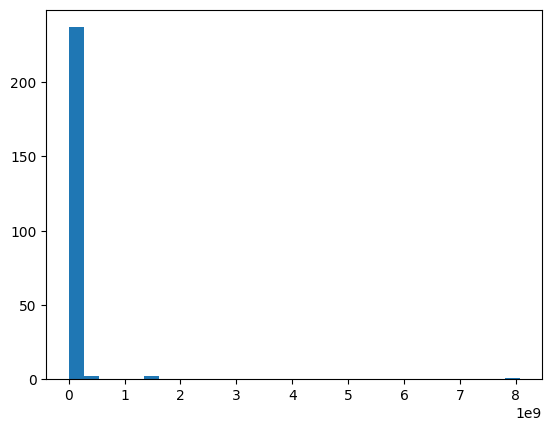

In [ ]:
import matplotlib.pyplot as plt


population_data = final_countries_dependency_df["Population"]


plt.hist(population_data, bins=30)

plt.show()


<BarContainer object of 242 artists>

Text(0.5, 0, 'Population')

Text(0, 0.5, 'Country/Dependency')

Text(0.5, 1.0, 'Population of Countries/Dependencies')

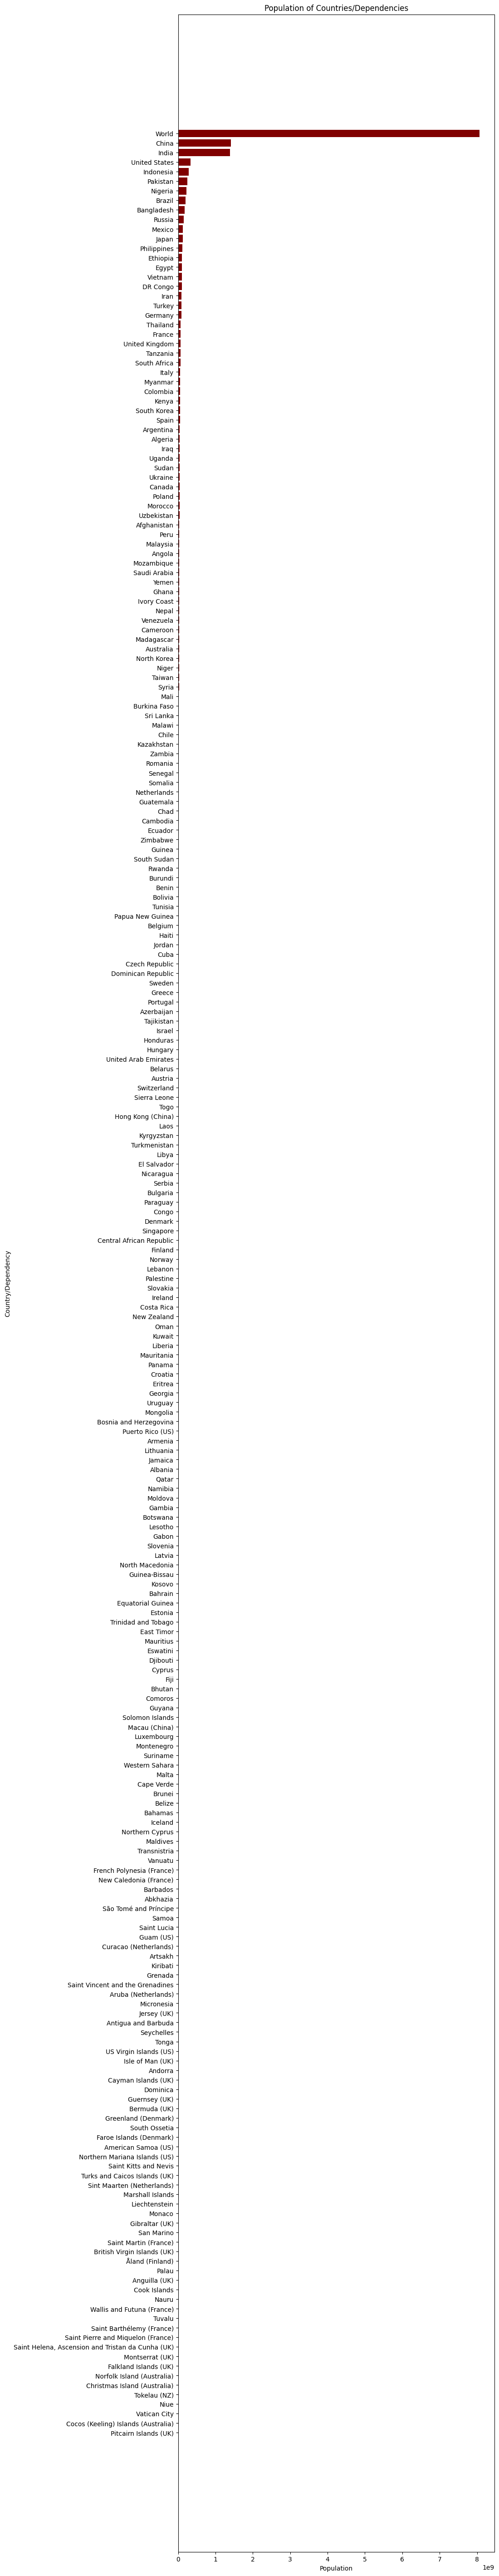

In [ ]:
import matplotlib.pyplot as plt


final_countries_dependency_df = final_countries_dependency_df.sort_values("Population")

population = final_countries_dependency_df["Population"]
countries = final_countries_dependency_df["Country/Dependency"]


plt.barh(countries, population, color='maroon')

plt.xlabel("Population")
plt.ylabel("Country/Dependency")
plt.title("Population of Countries/Dependencies")

# The sets the width to 8 inches and the height to 0.4 times the number of countries in your dataset
plt.gcf().set_size_inches(9, 0.3 * len(countries))

plt.show()

